In [46]:
# m --> no of data points

In [69]:
import numpy  as np
import matplotlib.pyplot as plt

%matplotlib inline

In [70]:
from sklearn.datasets import make_regression

(500, 1) (500,)


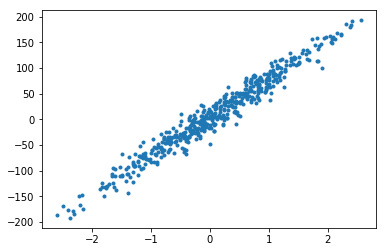

In [71]:
X,y= make_regression(n_samples=500, n_features=1,bias = 4.2, noise = 15)

print(X.shape,y.shape)  # bias is now much it is away from zero and noise tells us about the data spread

#plt.xlim(-10,10)
#plt.ylim(-10,10)

plt.plot(X,y,'.')
plt.show()

In [72]:
split = int(0.8 * X.shape[0])

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(400, 1) (100, 1) (400,) (100,)


In [73]:
def hypothesis(x,W):  #x0=1 and x1 =? and X -- vector and W -- vector as 2 will be passed
    x0=1
    x1=x# here we have passed 1 value
    h = W[0] * x0 + W[1] * x1
    return h
    

In [74]:
def get_error(X,W,y_true):
    err = 0
    m = X.shape[0]
    
    for i in range(m):
        err +=(hypothesis(X[i],W) - y_true[i]) **2
    
    err = err/(2*m)  # here we will get average squared error
    return err
    

In [75]:
def gradient_descent(X,W,y_true,learning_rate=0.1):
    
     #error = get_error(X,W,y_true) before updating weights error
    
    m = X.shape[0]
    grad0 = 0.0
    grad1 = 0.0
    
    for i in range(m):
        grad0 += (y_true[i] - hypothesis(X[i],W))
        grad1 += (y_true[i] - hypothesis(X[i],W))*(X[i])
    
    grad0 /=m
    grad1 /=m
    
    W[0] += learning_rate*grad0
    W[1] += learning_rate * grad1
    error = get_error(X,W,y_true)
    return error,W

In [76]:
W = np.array([0.1,0.1])
loss = []

for i in range(50):
    err,W = gradient_descent(X_train,W,y_train,learning_rate=0.1)
    loss.append(err)
print(W)

[ 4.22301164 73.69307638]


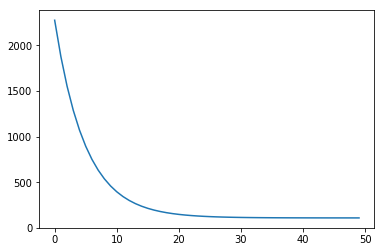

In [77]:
plt.plot(loss)
plt.show()

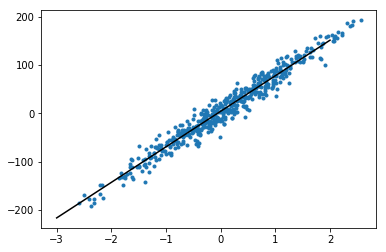

In [78]:
plt.plot(X,y,'.')

x_hyp = np.arange(-3,3)
y_hyp = W[0] + W[1] *x_hyp
plt.plot(x_hyp,y_hyp,'k')
plt.show()

In [79]:
# after decreasing the learnjng rate we can see that curve doesnot decreases faster, whereas after after incearing the learning rate
# we can see that error decreases rapidly.

#### Stochastic gradient

In [80]:
def stochastic_gradient(X,W,y_true,learning_rate=0.1):
    
    m = X.shape[0]
    loss = []
    
    for i in range(m):
        grad0 = (y_true[i] - hypothesis(X[i],W))
        grad1 = (y_true[i] - hypothesis(X[i],W)) * X[i]
        W[0] += learning_rate * grad0
        W[1] += learning_rate * grad1
        err = get_error(X,W,y_true)
        loss.append(err)
    return loss,W

In [81]:
# here we can call the loop once, whereas in previous we have call the loop 400 times means we have updates the theta 400 times
# but here it is already updated 1000 times

In [91]:
W = np.array([0.1,0.1])
loss,W = stochastic_gradient(X_train,W,y_train)
print(W)

[ 2.46868513 77.24911851]


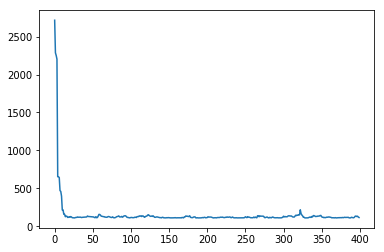

In [83]:
plt.plot(loss)
plt.show()

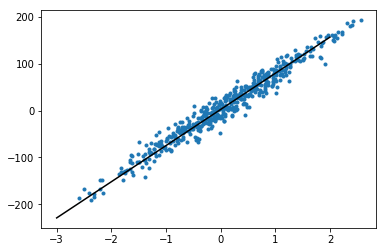

In [84]:
plt.plot(X,y,'.')

x_hyp = np.arange(-3,3)
y_hyp = W[0] + W[1] *x_hyp
plt.plot(x_hyp,y_hyp,'k')
plt.show()

In [85]:
from sklearn.linear_model import LinearRegression

In [92]:
lr = LinearRegression()
lr.fit(X_train,y_train)

lr.score(X_test,y_test)  # It is an R^2 error

0.9569126408578221

In [88]:
lr.coef_

array([74.19936714])

In [89]:
lr.intercept_

4.087916332767745